In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
from sklearn.cluster import KMeans
import sys
from pandas_profiling import ProfileReport

Considerações Iniciais:
Usar o K-Means para separar os herois em 3 categorias (ou clusters) diferentes em NLP e Numérico

In [2]:
data = pd.read_csv('superheroes_nlp_dataset.csv')
data = data.fillna(" ")

**Descrição dos Dados de todo o Dataset**

In [3]:
profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
profile

In [4]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

**Prévia do Dataset**

In [5]:
data.head()

name               real_name               full_name  \
0        3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1  514A (Gotham)             Bruce Wayne                           
2         A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3             Aa                      Aa                           
4     Aaron Cash              Aaron Cash              Aaron Cash   

  overall_score                                       history_text  \
0             6  Delroy Garrett, Jr. grew up to become a track ...   
1            10  He was one of the many prisoners of Indian Hil...   
2            20   Richard "Rick" Jones was orphaned at a young ...   
3            12  Aa is one of the more passive members of the P...   
4             5  Aaron Cash is the head of security at Arkham A...   

                                         powers_text  intelligence_score  \
0                                                                     85   
1                                                                    100   
2    On rare occasions, and through unusual circu...                  80   
3                                                                     80   
4                                                                     80   

   strength_score  speed_score  durability_score  ...  has_flight  \
0              30           60                60  ...           0   
1              20           30                50  ...           0   
2             100           80               100  ...           0   
3              50           55                45  ...           0   
4              10           25                40  ...           0   

   has_accelerated_healing has_weapons_master has_intelligence has_reflexes  \
0                        0                  0                0            0   
1                        0                  0                0            1   
2                        1                  0                0            1   
3                        0                  0                0            0   
4                        0                  1                0            0   

  has_super_speed has_durability has_stamina has_agility has_super_strength  
0               1              0           0           0                  1  
1               0              1           0           0                  1  
2               1              1           1           1                  1  
3               0              0           0           0                  0  
4               0              0           0           0                  0  

[5 rows x 81 columns]

In [6]:
data.columns

Index(['name', 'real_name', 'full_name', 'overall_score', 'history_text',
       'powers_text', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score', 'superpowers',
       'alter_egos', 'aliases', 'place_of_birth', 'first_appearance',
       'creator', 'alignment', 'occupation', 'base', 'teams', 'relatives',
       'gender', 'type_race', 'height', 'weight', 'eye_color', 'hair_color',
       'skin_color', 'img', 'has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'ha

**Inicialmente trabalharemos apenas com 6 colunas das 81 disponíveis**

Análise numérica de scores

In [7]:
short_data = data[["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]]

In [8]:
short_data.describe()

intelligence_score  strength_score  speed_score  durability_score  \
count         1450.000000     1450.000000  1450.000000       1450.000000   
mean            79.103448       39.458621    46.389655         56.193103   
std             25.048393       34.385566    29.205902         31.647711   
min              0.000000        0.000000     0.000000          0.000000   
25%             75.000000       10.000000    25.000000         30.000000   
50%             85.000000       30.000000    40.000000         55.000000   
75%             95.000000       65.000000    65.000000         85.000000   
max            100.000000      100.000000   100.000000        100.000000   

       power_score  combat_score  
count  1450.000000   1450.000000  
mean     66.913793     68.175862  
std      33.225127     29.540420  
min       0.000000      0.000000  
25%      40.000000     55.000000  
50%      72.500000     75.000000  
75%     100.000000     90.000000  
max     100.000000    100.000000

**Utilizando modelo PCA**

In [9]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(short_data)

#Components PCA
print(pca.components_)

[[-0.25691853 -0.47127043 -0.40727426 -0.46938034 -0.46053678 -0.33706483]
 [-0.52817051  0.53325932  0.10120459  0.18595451 -0.07523418 -0.62144089]
 [-0.07582368 -0.31782594 -0.19693964 -0.0469491   0.85116253 -0.35744979]
 [-0.22728389 -0.36747115  0.86957063 -0.23327954  0.0092559  -0.05146743]
 [ 0.76341395 -0.01153324  0.16820184  0.02881189 -0.14969512 -0.60459532]
 [ 0.12174038  0.50730395  0.02559589 -0.82924624  0.18781304  0.06514419]]


In [10]:
from sklearn.preprocessing import StandardScaler

features_ = ["intelligence_score","strength_score","speed_score","durability_score","power_score","combat_score"]
x1 = short_data.loc[:, features_].values

x = StandardScaler().fit_transform(x1)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents

array([[ 0.09355663, -0.23095399],
       [ 0.27194402, -1.57207134],
       [-2.42439407,  1.2375912 ],
       ...,
       [-1.98367302,  0.11163523],
       [ 0.04691169,  0.59136815],
       [-0.91670345,  2.26348063]])

In [12]:
df = pd.DataFrame(data=principalComponents, columns=["pc1","pc2"])
df

pc1       pc2
0     0.093557 -0.230954
1     0.271944 -1.572071
2    -2.424394  1.237591
3    -0.359640  0.382496
4     1.586695 -0.443769
...        ...       ...
1445  0.631886 -0.746571
1446 -2.721119  1.375851
1447 -1.983673  0.111635
1448  0.046912  0.591368
1449 -0.916703  2.263481

[1450 rows x 2 columns]

KeyError: 'pc1'

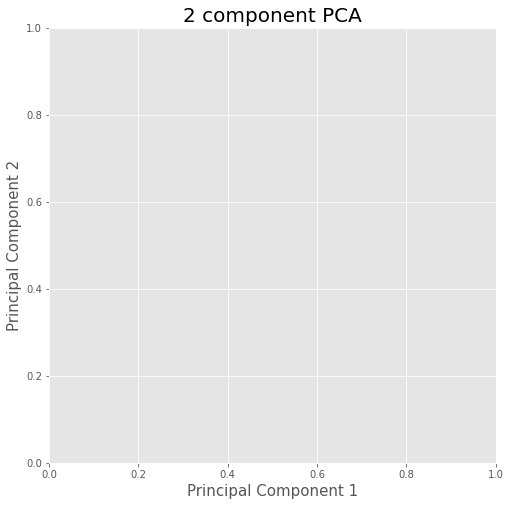

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
colors = ['r', 'g', 'b']
for color in colors:
    ax.set_title('2 component PCA', fontsize = 20)
    ax.scatter(df['pc1'], df['pc2'], c = color, s = 50)
ax.grid()

Variância

In [14]:
print(pca.explained_variance_)

[3.83524886 0.94685463]


**K-MEANS**

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline
print("a")

a


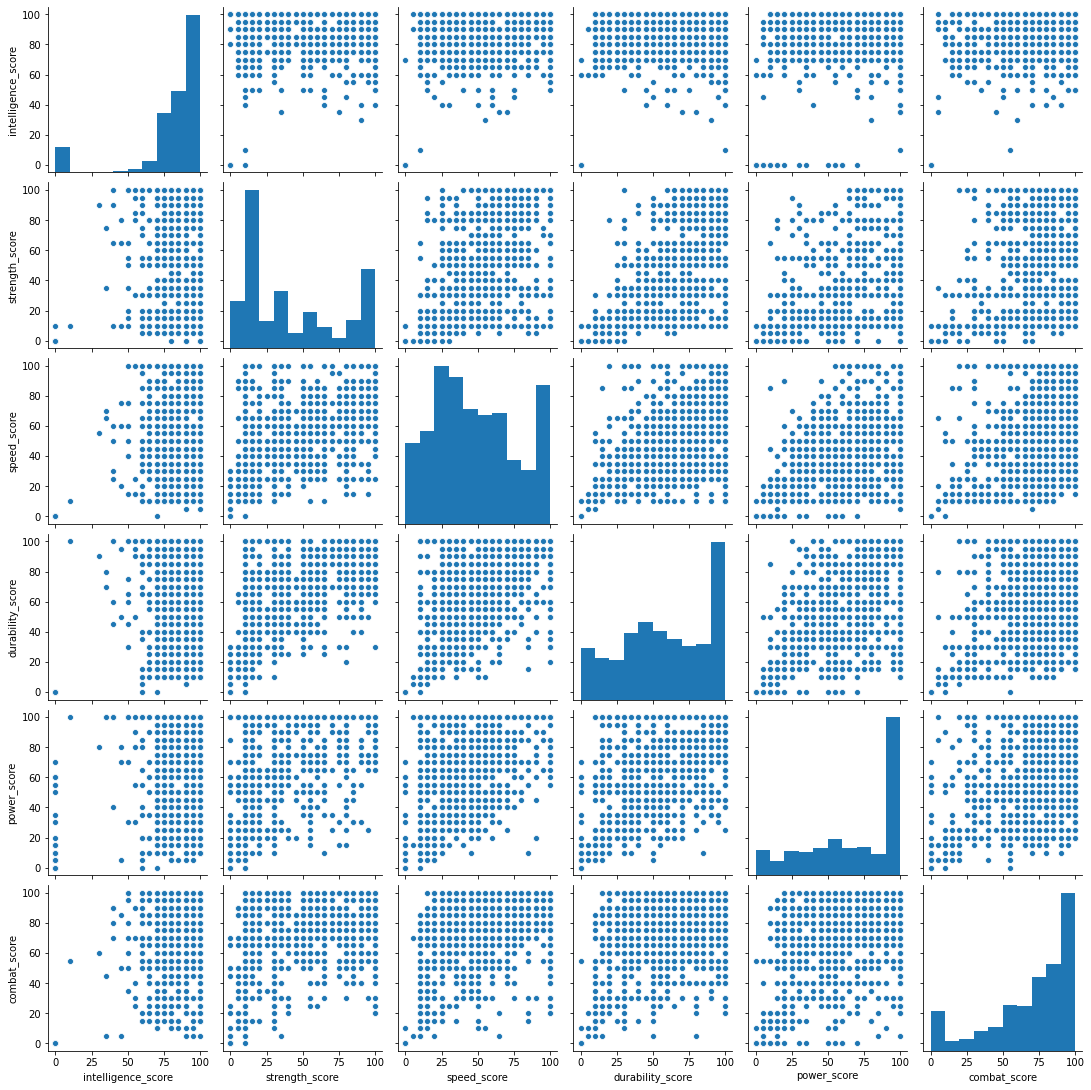

In [16]:
sb.pairplot(short_data)
plt.show()

In [17]:
X = np.array(short_data)

In [18]:
X

array([[ 85,  30,  60,  60,  40,  70],
       [100,  20,  30,  50,  35, 100],
       [ 80, 100,  80, 100, 100,  80],
       ...,
       [ 95,  50, 100,  75, 100,  80],
       [ 75,  10, 100,  30, 100,  30],
       [ 45,  80,  75,  95,  80,  50]], dtype=int64)

In [19]:
np.set_printoptions(threshold=sys.maxsize)

**Teste**

In [20]:
k=calculate_wcss(X)

In [21]:
print(k)

[4714468.349248961, 3130166.6321322597, 2512993.9389394503, 2216585.488210731, 1973586.509831188, 1780918.006229242, 1641533.1249599545, 1549397.8055650722, 1471619.2283161478, 1403431.6763883925, 1343486.6075594127, 1294376.5536442765, 1259371.1608229734, 1207930.529200704, 1170049.77796417, 1140939.8688468954, 1109727.1222731532, 1078815.8326052132, 1054569.3116385583]


In [22]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [23]:
number = optimal_number_of_clusters(k)

In [24]:
number

6

In [25]:
kmeans = KMeans(n_clusters=6,random_state=0)

In [26]:
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [27]:
predict = kmeans.predict(X)
print(predict)

[4 4 2 3 5 4 3 0 2 3 3 2 3 0 3 2 0 3 3 4 4 0 5 4 5 4 5 4 3 4 2 4 0 4 4 0 5
 5 0 0 2 3 3 2 5 4 2 2 1 5 0 0 2 1 5 3 5 5 3 2 0 4 0 5 3 5 2 2 0 2 5 0 3 0
 2 2 0 4 3 5 0 0 2 5 5 3 2 0 5 3 5 4 4 4 4 3 3 2 3 5 4 1 4 0 3 4 0 3 3 3 2
 2 4 0 0 4 4 5 4 3 4 0 5 4 4 4 4 4 4 5 3 3 4 3 4 3 4 4 4 4 4 0 0 4 4 1 3 3
 4 4 2 2 0 2 2 0 5 4 5 1 2 5 1 1 4 3 3 3 2 2 1 2 2 2 2 3 2 3 4 4 4 3 4 3 4
 4 1 3 2 4 3 4 3 3 3 4 4 4 5 5 4 3 5 4 5 3 1 0 0 0 0 3 1 0 3 3 0 1 5 4 0 2
 1 5 3 5 0 4 3 5 5 4 4 4 4 4 0 1 2 5 0 3 0 3 3 2 3 4 0 4 4 3 4 3 3 4 2 4 4
 4 0 4 5 1 5 2 0 4 2 4 3 4 2 3 4 4 4 4 2 1 0 1 4 1 2 4 5 2 4 4 5 4 5 3 0 1
 1 0 0 0 3 3 3 5 4 1 3 0 1 3 4 0 0 3 3 3 4 4 3 4 5 1 0 2 2 3 5 1 4 4 4 5 0
 1 1 0 2 2 0 5 4 3 5 5 4 3 5 3 1 2 3 5 3 4 1 5 2 2 3 5 3 3 3 3 3 5 5 4 3 5
 3 4 4 4 4 4 2 3 3 4 3 3 3 3 4 3 3 0 2 2 0 0 2 2 3 5 2 0 1 3 4 2 4 4 4 4 3
 3 4 4 0 2 0 2 2 0 2 0 4 4 0 2 0 5 4 3 3 5 5 4 3 2 0 4 3 0 3 3 4 4 4 5 0 5
 3 3 2 1 2 3 2 4 0 4 3 3 3 0 0 3 1 3 4 2 0 3 0 2 2 2 1 3 0 4 0 3 5 0 5 3 3
 0 2 1 3 5 3 3 3 1 3 5 5 

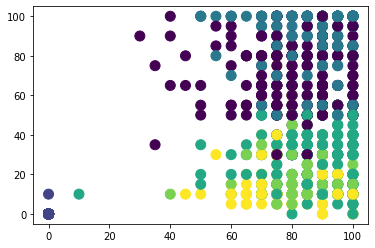

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=predict,
            s=100, cmap='viridis');

In [29]:
short_data["k-classes"] = kmeans.labels_
short_data["name"] = data["name"]

<ipython-input-29-f2de2485b4e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_data["k-classes"] = kmeans.labels_
<ipython-input-29-f2de2485b4e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_data["name"] = data["name"]


In [30]:
kmeans2 = KMeans(n_clusters=2,random_state=0)
kmeans2.fit(X)
predict_2 = kmeans2.predict(X)
print(predict_2)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 1 1 1 

In [31]:
short_data.head(20)

intelligence_score  strength_score  speed_score  durability_score  \
0                   85              30           60                60   
1                  100              20           30                50   
2                   80             100           80               100   
3                   80              50           55                45   
4                   80              10           25                40   
5                   90              40           45                55   
6                   95              30           35                65   
7                   75              90           55                65   
8                   85             100           80                90   
9                  100              10           20                30   
10                 100              10           25                70   
11                 100             100          100               100   
12                  75              15           30                40   
13                  70              80           25               100   
14                  85              20           65                55   
15                  90             100           75               100   
16                  75              65           60                50   
17                  85              30           70                55   
18                  80              10           10               100   
19                  90              10           35                40   

    power_score  combat_score  k-classes                 name  
0            40            70          4              3-D Man  
1            35           100          4        514A (Gotham)  
2           100            80          2               A-Bomb  
3           100            55          3                   Aa  
4            30            50          5           Aaron Cash  
5            55            85          4         Aayla Secura  
6           100            85          3           Abe Sapien  
7           100            65          0             Abin Sur  
8           100            95          2          Abomination  
9           100            55          3    Abra Kadabra (CW)  
10          100            80          3         Abra Kadabra  
11          100           100          2              Abraxas  
12          100            85          3  Absorbing Man (MCU)  
13          100            65          0        Absorbing Man  
14           80            90          3           Ace Morgan  
15          100           100          2   Achilles Warkiller  
16          100            70          0             Acidicus  
17           65           100          3                A'dal  
18          100            65          3          Adam Monroe  
19           55            70          4         Adam Strange

Hmk

**Aplicação com NLP**

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

In [33]:
text_data = data[["name","real_name","full_name","history_text","powers_text"]]
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [34]:
text_data.head()

name               real_name               full_name  \
0        3-D Man     Delroy Garrett, Jr.     Delroy Garrett, Jr.   
1  514A (Gotham)             Bruce Wayne                           
2         A-Bomb  Richard Milhouse Jones  Richard Milhouse Jones   
3             Aa                      Aa                           
4     Aaron Cash              Aaron Cash              Aaron Cash   

                                        history_text  \
0  Delroy Garrett, Jr. grew up to become a track ...   
1  He was one of the many prisoners of Indian Hil...   
2   Richard "Rick" Jones was orphaned at a young ...   
3  Aa is one of the more passive members of the P...   
4  Aaron Cash is the head of security at Arkham A...   

                                         powers_text  
0                                                     
1                                                     
2    On rare occasions, and through unusual circu...  
3                                                     
4

**Seleção de Stopwords, Remoção de Missing Data e Aplicação de Lowercase**

In [35]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
text_data = text_data.fillna('').astype(str).apply(lambda x: x.str.lower())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\victo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Preview de Dataset**

In [36]:
text_data.head(10)

name               real_name               full_name  \
0            3-d man     delroy garrett, jr.     delroy garrett, jr.   
1      514a (gotham)             bruce wayne                           
2             a-bomb  richard milhouse jones  richard milhouse jones   
3                 aa                      aa                           
4         aaron cash              aaron cash              aaron cash   
5       aayla secura            aayla secura                           
6         abe sapien          abraham sapien          abraham sapien   
7           abin sur                                                   
8        abomination            emil blonsky            emil blonsky   
9  abra kadabra (cw)                 unknown                 unknown   

                                        history_text  \
0  delroy garrett, jr. grew up to become a track ...   
1  he was one of the many prisoners of indian hil...   
2   richard "rick" jones was orphaned at a young ...   
3  aa is one of the more passive members of the p...   
4  aaron cash is the head of security at arkham a...   
5  ayla secura was a rutian twi'lek jedi knight (...   
6   sapien began life as langdon everett caul, a ...   
7   originally a history professor on the planet ...   
8  formerly known as emil blonsky, a spy of sovie...   
9  "abra kadabra" was a criminal time traveler fr...   

                                         powers_text  
0                                                     
1                                                     
2    on rare occasions, and through unusual circu...  
3                                                     
4                                                     
5                                                     
6   abe is a humanoid amphibious creature. he has...  
7    abin sur possessed an exceptionally strong s...  
8  'blonsky''s transformation into the abominatio...  
9   abra kadabra was augmented with various nanot...

**Compilado das colunas de texto**

In [37]:
text_data["comp"] = text_data["name"] + " " + text_data["real_name"] + " " + text_data["full_name"] + " " + text_data["history_text"] + " " + text_data["powers_text"]

**Vetorização e remoção de stopwords**

In [38]:
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(text_data.comp.values)
features = vec.transform(text_data.comp.values)

In [39]:
print(features)

  (0, 30759)	0.04110477166511444
  (0, 30338)	0.08779223074772098
  (0, 30070)	0.053193262248455976
  (0, 29923)	0.1449963873775915
  (0, 29825)	0.289992774755183
  (0, 29607)	0.07321192828988521
  (0, 29211)	0.11220902442148872
  (0, 29008)	0.10139519670167409
  (0, 27542)	0.15318295391372122
  (0, 27365)	0.0708552001303067
  (0, 27122)	0.10301130358485029
  (0, 27009)	0.0965815452496764
  (0, 23723)	0.11119787012098001
  (0, 21931)	0.0745866713924988
  (0, 21849)	0.10669247744128552
  (0, 20201)	0.03244037622561983
  (0, 20155)	0.09784386610554086
  (0, 19946)	0.08027650855695151
  (0, 19826)	0.12281479291054803
  (0, 19580)	0.10570737683140717
  (0, 19566)	0.05326473332270717
  (0, 19228)	0.07120034626814901
  (0, 18103)	0.12788897129845062
  (0, 17595)	0.0810501972490704
  (0, 17151)	0.05475000255727349
  :	:
  (1449, 2908)	0.01995331934475592
  (1449, 2821)	0.09533525391043048
  (1449, 2676)	0.006072163954874463
  (1449, 2627)	0.018333017676493448
  (1449, 2611)	0.0113269699243454

**Predição por K-Means**

In [40]:
#km=calculate_wcss(features)
#number = optimal_number_of_clusters(km)

In [41]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000, tol=0.0001, precompute_distances=True, verbose=0, random_state=None, n_jobs=1)

km.fit(features)

predicted = km.predict(features)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [42]:
predicted

array([1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,

In [43]:
from sklearn.decomposition import PCA

# First: for every document we get its corresponding cluster
clusters = km.predict(features)

# We train the PCA on the dense version of the tf-idf. 
pca = PCA(n_components=2)
two_dim = pca.fit_transform(features.todense())

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component



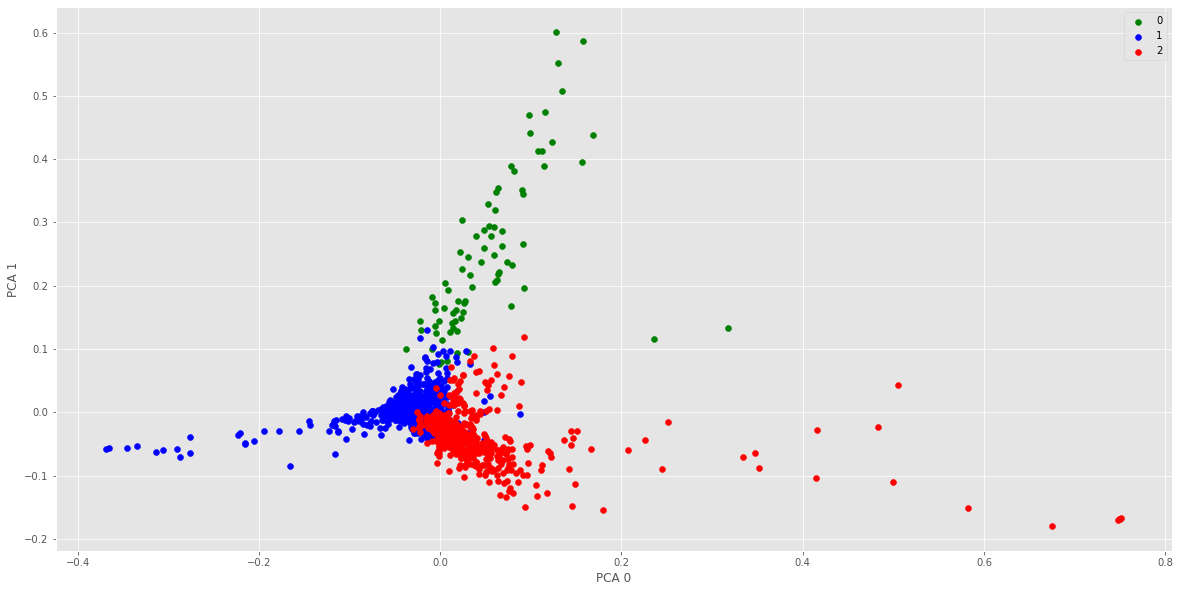

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [45]:
text_data["k-classes"] = predicted

In [46]:
text_data.head(10)

name               real_name               full_name  \
0            3-d man     delroy garrett, jr.     delroy garrett, jr.   
1      514a (gotham)             bruce wayne                           
2             a-bomb  richard milhouse jones  richard milhouse jones   
3                 aa                      aa                           
4         aaron cash              aaron cash              aaron cash   
5       aayla secura            aayla secura                           
6         abe sapien          abraham sapien          abraham sapien   
7           abin sur                                                   
8        abomination            emil blonsky            emil blonsky   
9  abra kadabra (cw)                 unknown                 unknown   

                                        history_text  \
0  delroy garrett, jr. grew up to become a track ...   
1  he was one of the many prisoners of indian hil...   
2   richard "rick" jones was orphaned at a young ...   
3  aa is one of the more passive members of the p...   
4  aaron cash is the head of security at arkham a...   
5  ayla secura was a rutian twi'lek jedi knight (...   
6   sapien began life as langdon everett caul, a ...   
7   originally a history professor on the planet ...   
8  formerly known as emil blonsky, a spy of sovie...   
9  "abra kadabra" was a criminal time traveler fr...   

                                         powers_text  \
0                                                      
1                                                      
2    on rare occasions, and through unusual circu...   
3                                                      
4                                                      
5                                                      
6   abe is a humanoid amphibious creature. he has...   
7    abin sur possessed an exceptionally strong s...   
8  'blonsky''s transformation into the abominatio...   
9   abra kadabra was augmented with various nanot...   

                                                comp  k-classes  
0  3-d man delroy garrett, jr. delroy garrett, jr...          1  
1  514a (gotham) bruce wayne   he was one of the ...          0  
2  a-bomb richard milhouse jones richard milhouse...          2  
3  aa aa   aa is one of the more passive members ...          1  
4  aaron cash aaron cash aaron cash aaron cash is...          1  
5  aayla secura aayla secura   ayla secura was a ...          1  
6  abe sapien abraham sapien abraham sapien  sapi...          1  
7  abin sur      originally a history professor o...          1  
8  abomination emil blonsky emil blonsky formerly...          2  
9  abra kadabra (cw) unknown unknown "abra kadabr...          1

In [47]:
data_comp = pd.DataFrame(columns = ['nlp', 'nbr']) 
data_comp["nlp"] = text_data["k-classes"]
data_comp["nbr"] = short_data["k-classes"]

In [48]:
data_comp.head(20)

nlp  nbr
0     1    4
1     0    4
2     2    2
3     1    3
4     1    5
5     1    4
6     1    3
7     1    0
8     2    2
9     1    3
10    1    3
11    2    2
12    1    3
13    2    0
14    1    3
15    1    2
16    1    0
17    1    3
18    2    3
19    2    4

In [49]:
from sklearn import preprocessing
df = data.copy()
# Get dataset
df = df.select_dtypes(['number'])
df

intelligence_score  strength_score  speed_score  durability_score  \
0                     85              30           60                60   
1                    100              20           30                50   
2                     80             100           80               100   
3                     80              50           55                45   
4                     80              10           25                40   
...                  ...             ...          ...               ...   
1445                  90              10           25                30   
1446                  80             100          100               100   
1447                  95              50          100                75   
1448                  75              10          100                30   
1449                  45              80           75                95   

      power_score  combat_score  
0              40            70  
1              35           100  
2             100            80  
3             100            55  
4              30            50  
...           ...           ...  
1445          100            55  
1446          100            80  
1447          100            80  
1448          100            30  
1449           80            50  

[1450 rows x 6 columns]

In [50]:
df = df.fillna(0)
x_array = np.array(df)
x_array.shape

(1450, 6)

In [51]:
normalized_X = preprocessing.normalize(x_array)

In [52]:
normalized_X

array([[0.57536283, 0.20306923, 0.40613847, 0.40613847, 0.27075898,
        0.47382821],
       [0.63213954, 0.12642791, 0.18964186, 0.31606977, 0.22124884,
        0.63213954],
       [0.36066785, 0.45083482, 0.36066785, 0.45083482, 0.45083482,
        0.36066785],
       [0.48709005, 0.30443128, 0.33487441, 0.27398815, 0.60886257,
        0.33487441],
       [0.72652257, 0.09081532, 0.2270383 , 0.36326129, 0.27244597,
        0.45407661],
       [0.56920998, 0.25298221, 0.28460499, 0.34785054, 0.34785054,
        0.5375872 ],
       [0.52615634, 0.16615463, 0.19384707, 0.3600017 , 0.55384878,
        0.47077146],
       [0.39975134, 0.47970161, 0.29315098, 0.34645116, 0.53300179,
        0.34645116],
       [0.37731225, 0.44389676, 0.35511741, 0.39950709, 0.44389676,
        0.42170192],
       [0.63985669, 0.06398567, 0.12797134, 0.19195701, 0.63985669,
        0.35192118],
       [0.55879876, 0.05587988, 0.13969969, 0.39115913, 0.55879876,
        0.447039  ],
       [0.40824829, 0

In [53]:
k2=calculate_wcss(normalized_X)

In [54]:
number = optimal_number_of_clusters(k2)
number

6

In [55]:
kme = KMeans(n_clusters=6,random_state=0)
kme.fit(normalized_X)

KMeans(n_clusters=6, random_state=0)

In [56]:
predicted2 = kme.predict(normalized_X)

In [57]:
predicted2

array([3, 3, 0, 5, 3, 3, 5, 0, 0, 5, 5, 0, 5, 0, 5, 0, 0, 3, 5, 3, 3, 0,
       1, 3, 1, 3, 3, 3, 5, 3, 0, 3, 0, 5, 3, 0, 1, 3, 0, 0, 0, 5, 5, 0,
       1, 5, 0, 0, 4, 0, 0, 0, 0, 2, 0, 5, 5, 5, 5, 0, 0, 3, 0, 1, 5, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 5, 3, 5, 0, 0,
       1, 5, 3, 3, 3, 3, 3, 5, 5, 0, 5, 5, 3, 2, 3, 0, 5, 3, 0, 5, 5, 3,
       0, 0, 3, 0, 0, 3, 5, 0, 3, 5, 3, 5, 1, 3, 3, 3, 3, 3, 3, 5, 5, 5,
       3, 5, 3, 5, 3, 3, 3, 3, 3, 0, 0, 3, 3, 4, 5, 5, 3, 5, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 2, 0, 3, 4, 4, 3, 5, 5, 5, 0, 0, 4, 0, 0, 0, 0, 5,
       0, 3, 3, 3, 3, 3, 3, 5, 3, 3, 2, 5, 0, 3, 5, 5, 5, 5, 5, 3, 3, 3,
       3, 5, 3, 5, 5, 5, 5, 5, 2, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 4, 1, 5,
       0, 0, 2, 0, 5, 1, 0, 3, 5, 1, 1, 3, 0, 3, 3, 3, 0, 4, 0, 3, 0, 5,
       0, 5, 5, 0, 5, 3, 0, 3, 3, 0, 3, 3, 5, 3, 0, 3, 3, 3, 0, 3, 1, 4,
       1, 0, 0, 3, 0, 3, 5, 3, 0, 5, 3, 3, 3, 3, 0, 2, 0, 4, 5, 2, 0, 5,
       3, 0, 3, 3, 1, 3, 3, 5, 0, 2, 4, 0, 0, 0, 5,

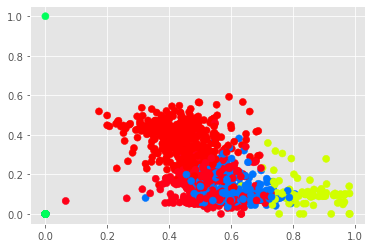

In [58]:
plt.scatter(normalized_X[:, 0], normalized_X[:, 1], c=predicted2,
            s=50, cmap='hsv');